In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix
import seaborn as sns
import re
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
import nltk
from sklearn.metrics import roc_curve, RocCurveDisplay
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Cargar el CSV
data = pd.read_csv('/content/drive/My Drive/Colab Notebooks/datos.csv')
data.head()

,review,sentiment
0,I love sci-fi and am willing to put up with a ...,0
1,"Worth the entertainment value of a rental, esp...",0
2,its a totally average film with a few semi-alr...,0
3,STAR RATING: ***** Saturday Night **** Friday ...,0
4,"First off let me say, If you haven't enjoyed a...",0


# Cleaning the data

In [ ]:
nltk.download('stopwords')
nltk.download('punkt')
corpus = []
ps = PorterStemmer()
for i in range(0, 50000):
  review = re.sub('[^a-zA-Z]', ' ', data['review'][i])
  review = review.lower()
  review = review.split()
  all_stopwords = stopwords.words('english')
  all_stopwords.remove('not')
  review = [ps.stem(word) for word in review if not word in set(all_stopwords)]
  review = ' '.join(review)
  corpus.append(review)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
data['review'] = corpus

In [ ]:
# Separar atributos y clases
X_text = data['review']  # Ajusta 'texto_columna' al nombre de la columna con texto
y = data['sentiment']

Aplica TFIDF o BoW:


# TFIDF

In [ ]:
# TF-IDF para convertir texto a características numéricas
tfidf = TfidfVectorizer(max_features=40000)  # Ajusta el número de características según sea necesario
X = tfidf.fit_transform(X_text)

KeyboardInterrupt: ignored

# Bag of words

In [ ]:
vectorizer = CountVectorizer(analyzer = 'word', tokenizer = None, preprocessor = None, stop_words = None, max_features = 10000)
X = data["review"]
Y = data['sentiment']

X = vectorizer.fit_transform(X)

In [ ]:
# Dividir datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Training the model

In [ ]:
# Crear el modelo MLP
mlp = MLPClassifier(hidden_layer_sizes=(100, 100, 50 , 50, 10), max_iter=500, alpha=0.0001,
                    solver='adam', verbose=10, random_state=42, learning_rate_init=0.001)

In [ ]:
# Entrenar el modelo
mlp.fit(X_train, y_train)

Iteration 1, loss = 0.34689666
Iteration 2, loss = 0.20049612
Iteration 3, loss = 0.12473675
Iteration 4, loss = 0.05860141
Iteration 5, loss = 0.02640354
Iteration 6, loss = 0.01834038
Iteration 7, loss = 0.01654005
Iteration 8, loss = 0.00731000
Iteration 9, loss = 0.00579145
Iteration 10, loss = 0.00517412
Iteration 11, loss = 0.00328376
Iteration 12, loss = 0.00564944
Iteration 13, loss = 0.00703232
Iteration 14, loss = 0.00790929
Iteration 15, loss = 0.00500351
Iteration 16, loss = 0.00494158
Iteration 17, loss = 0.00794080
Iteration 18, loss = 0.00532889
Iteration 19, loss = 0.00227989
Iteration 20, loss = 0.00113633
Iteration 21, loss = 0.00075558
Iteration 22, loss = 0.00073301
Iteration 23, loss = 0.00072079
Iteration 24, loss = 0.00071242
Iteration 25, loss = 0.00070533
Iteration 26, loss = 0.00069880
Iteration 27, loss = 0.00069227
Iteration 28, loss = 0.00068378
Iteration 29, loss = 0.00067709
Iteration 30, loss = 0.00067076
Iteration 31, loss = 0.00066407
Iteration 32, los

MLPClassifier(hidden_layer_sizes=(100, 100, 50, 50, 10), max_iter=500,
              random_state=42, verbose=10)

# Predicciones


In [ ]:
# Realizar predicciones en el conjunto de prueba
predictions = mlp.predict(X_test)

# Metricas de evaluación

In [ ]:
# Calcular métricas de evaluación
accuracy = accuracy_score(y_test, predictions)
precision = precision_score(y_test, predictions)
recall = recall_score(y_test, predictions)
f1 = f1_score(y_test, predictions)
conf_matrix = confusion_matrix(y_test, predictions)
class_report = classification_report(y_test, predictions)
# Fórmula para calcular F-Measure
f_measure = 2 * (precision * recall) / (precision + recall)

In [ ]:
# Imprimir métricas
print(f'Precisión del modelo: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1-score: {f1}')
print(f'F-Measure: {f_measure}')  # Imprimir F-Measure
print(f'Matriz de Confusión:\n{conf_matrix}')
print(f'Reporte de Clasificación:\n{class_report}')



Precisión del modelo: 0.8755
Precision: 0.8657572162910241
Recall: 0.885540950455005
F1-score: 0.8755373387983605
F-Measure: 0.8755373387983605
Matriz de Confusión:
[[4376  679]
 [ 566 4379]]
Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.89      0.87      0.88      5055
           1       0.87      0.89      0.88      4945

    accuracy                           0.88     10000
   macro avg       0.88      0.88      0.88     10000
weighted avg       0.88      0.88      0.88     10000



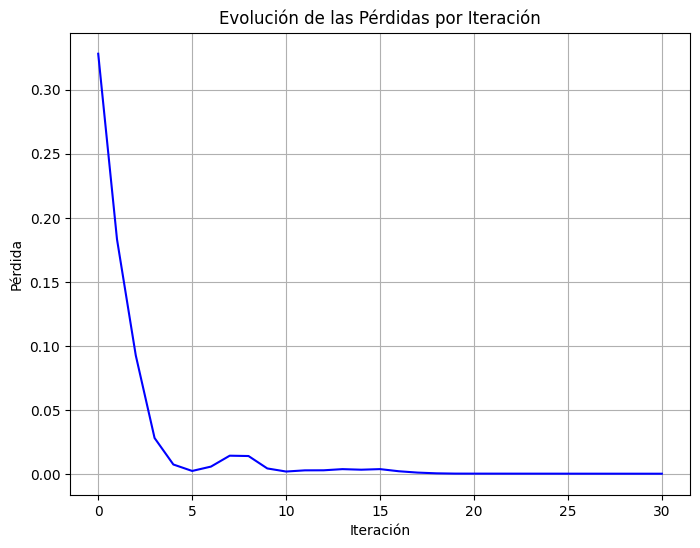

In [ ]:
# Obtener las pérdidas por iteración
losses = mlp.loss_curve_

# Graficar las pérdidas
plt.figure(figsize=(8, 6))
plt.plot(losses, color='blue')
plt.title('Evolución de las Pérdidas por Iteración')
plt.xlabel('Iteración')
plt.ylabel('Pérdida')
plt.grid(True)
plt.show()


<Figure size 800x600 with 0 Axes>

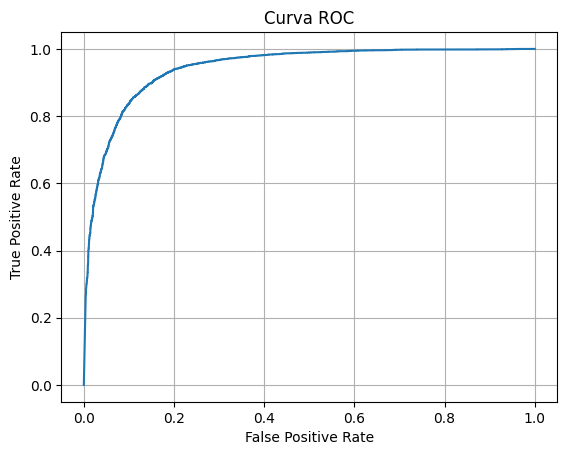

In [ ]:
# Realizar predicciones en el conjunto de prueba
probas = mlp.predict_proba(X_test)[:, 1]

# Calcular la curva ROC
fpr, tpr, _ = roc_curve(y_test, probas)

# Graficar la curva ROC
plt.figure(figsize=(8, 6))
roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr).plot()
plt.title('Curva ROC')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.grid(True)
plt.show()


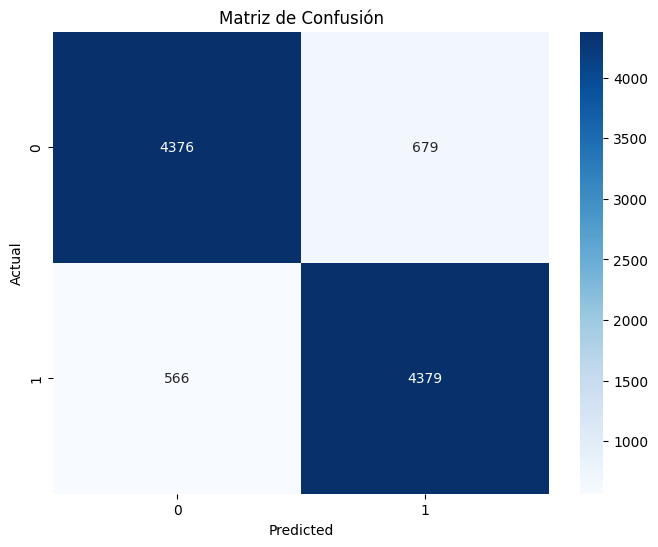

In [ ]:
predictions = mlp.predict(X_test)
conf_matrix = confusion_matrix(y_test, predictions)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g')
plt.title('Matriz de Confusión')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()